In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:\\Box Sync\\Fall_2016\\data_vis\\project\\data\\processed_data.csv")
# read the input as a pandas dataframe

In [3]:
df.head()

,Unnamed: 0,action_type,combined_shot_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,matchup,opponent,year
0,0,Jump Shot,Jump Shot,-157,0,10,1,0,2000-01,22,15,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Los Angeles Lakers,LAL @ POR,POR,2000
1,1,Jump Shot,Jump Shot,-101,135,7,1,0,2000-01,45,16,1,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL @ POR,POR,2000
2,2,Jump Shot,Jump Shot,138,175,6,1,0,2000-01,52,22,0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL @ POR,POR,2000
3,3,Driving Dunk Shot,Dunk,0,0,6,2,0,2000-01,19,0,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,LAL @ POR,POR,2000
4,4,Jump Shot,Jump Shot,-145,-11,9,3,0,2000-01,32,14,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Los Angeles Lakers,LAL @ POR,POR,2000


# Analysis with respect to period, time remaining and shots

In [4]:
df_sub1 = df[['period', 'minutes_remaining', 'seconds_remaining', 'shot_made_flag']]
# subset of data
df_sub1.head()

,period,minutes_remaining,seconds_remaining,shot_made_flag
0,1,10,22,0
1,1,7,45,1
2,1,6,52,0
3,2,6,19,1
4,3,9,32,0


In [5]:
df_sub1['sec_remain'] = df_sub1['minutes_remaining']*60 + df['seconds_remaining']
# total time remaining in seconds

C:\Users\anirudhkm\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [6]:
df_sub1['sec_elapsed_period_start'] = 60*(11 - df['minutes_remaining']) + (60 - df['seconds_remaining'])
# time elapsed from game start

C:\Users\anirudhkm\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
df_sub1.head()

,period,minutes_remaining,seconds_remaining,shot_made_flag,sec_remain,sec_elapsed_period_start
0,1,10,22,0,622,98
1,1,7,45,1,465,255
2,1,6,52,0,412,308
3,2,6,19,1,379,341
4,3,9,32,0,572,148


In [8]:
period_values = df_sub1['period'].unique()
# get period unique values
df_sub1['sec_elapsed_game_start'] = 0
for each in period_values:
    # iterate over each period values
    df_sub1['sec_elapsed_game_start'][df_sub1['period'] == each] = (each - 1)*720 + df_sub1['sec_elapsed_period_start'][df_sub1['period'] == each] 
    
df_sub1.head(10)

C:\Users\anirudhkm\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\anirudhkm\Anaconda3\lib\site-packages\pandas\core\generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\anirudhkm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec

,period,minutes_remaining,seconds_remaining,shot_made_flag,sec_remain,sec_elapsed_period_start,sec_elapsed_game_start
0,1,10,22,0,622,98,98
1,1,7,45,1,465,255,255
2,1,6,52,0,412,308,308
3,2,6,19,1,379,341,1061
4,3,9,32,0,572,148,1588
5,3,8,52,1,532,188,1628
6,3,6,12,1,372,348,1788
7,3,3,36,0,216,504,1944
8,3,1,56,0,116,604,2044
9,1,11,0,1,660,60,60


## Histogram of second remaining data

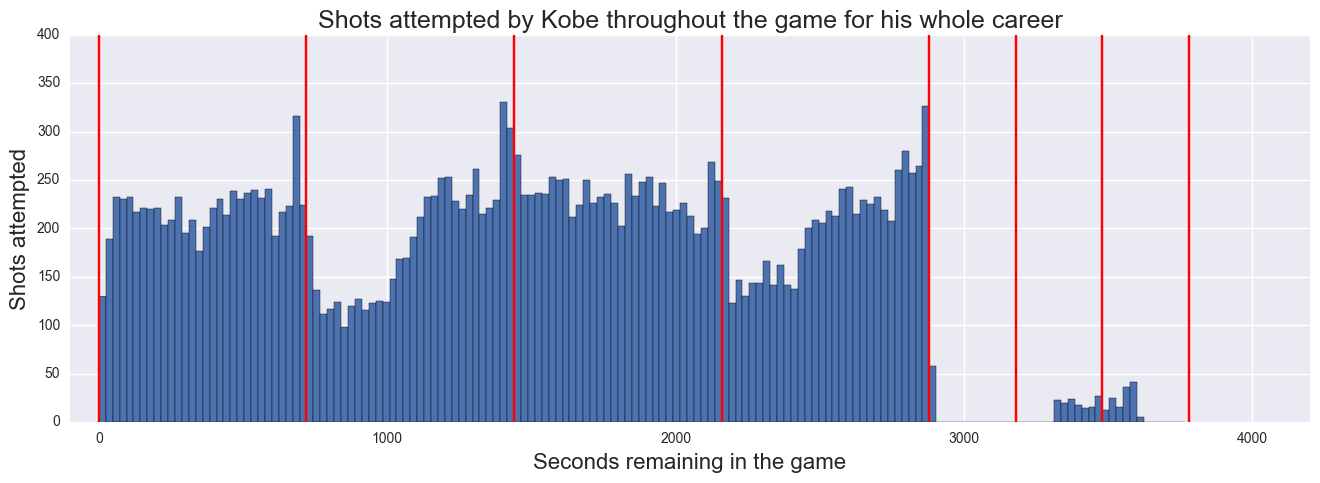

In [9]:
bins = np.arange(0, 60*(4*12+3*5), 24)
# define the bins
plt.figure(figsize=(16, 5))
plt.hist(df_sub1['sec_elapsed_game_start'], bins = bins)
# plot the histogram of the data
plt.vlines(x=[0, 12*60, 2*12*60, 3*12*60, 4*12*60, 4*12*60+5*60, 4*12*60+2*5*60, 4*12*60+3*5*60], ymin=0,ymax=400, colors='r')
# lines to show the end od a quarter
plt.xlim((-100, 4200))
plt.xlabel("Seconds remaining in the game", fontsize = 16)
plt.ylabel("Shots attempted", fontsize = 16)
plt.title("Shots attempted by Kobe throughout the game for his whole career", fontsize = 18)

## Finding accuracy for every 24 seconds

In [10]:
df_sub1['sec_bin'] = df_sub1['sec_elapsed_game_start']//24

C:\Users\anirudhkm\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
hit_accuracy_24sec = df_sub1[['sec_bin', 'shot_made_flag']].groupby('sec_bin').sum()/df_sub1[['sec_bin', 'shot_made_flag']].groupby('sec_bin').count()
hit_accuracy_24sec.head()

,shot_made_flag
sec_bin,
0,0.469231
1,0.428571
2,0.422414
3,0.486957
4,0.489270


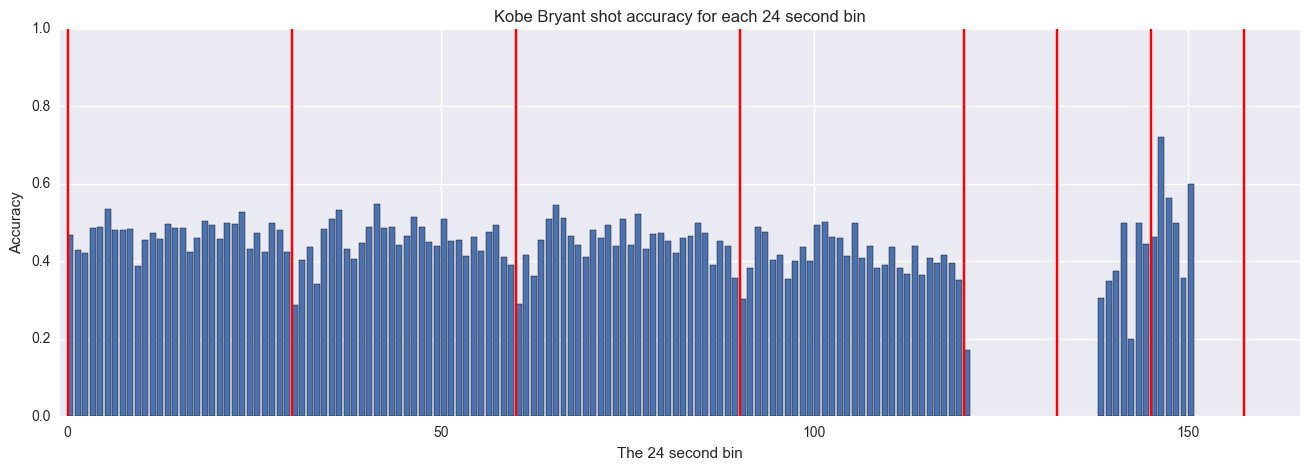

In [12]:
plt.figure(figsize=(16,5))
plt.bar(hit_accuracy_24sec.index[:-1], hit_accuracy_24sec['shot_made_flag'][:-1])
plt.vlines(x=[0, 1*30, 2*30, 3*30, 4*30, 4*30+1*12.5, 4*30+2*12.5, 4*30+3*12.5], ymin=0,ymax=1, colors='r')
plt.xlim(-1, 165)
plt.title("Kobe Bryant shot accuracy for each 24 second bin")
plt.xlabel("The 24 second bin")
plt.ylabel("Accuracy")

# Analysis of Kobe's shots from distance

In [13]:
df['distance'] = np.sqrt(df['loc_x']**2  + df['loc_y']**2)
# calculate dist from basket hoop
seasons = df['year'].unique()
# get unique seasons
opponents = df['opponent'].unique()
# get unique opponents
dist_season, dist_oppo = [], []
# empty lists
for season in seasons:
    # iterate over each season
    sub = df[df['year'] == season]
    dist_season.append(np.mean(sub['distance']))
    # get avg distance for each year
    
for oppo in opponents:
    # iterate over each season
    sub = df[df['opponent'] == oppo]
    dist_oppo.append(np.mean(sub['distance']))
    # get avg distance for each year


In [14]:
coff = np.polyfit(seasons, [i/10 for i in dist_season], 3)
x = np.linspace(1996, 2015, 500)
y = np.multiply(coff[0],x**3) + np.multiply(coff[1],x**2) + np.multiply(coff[2],x) + coff[3]

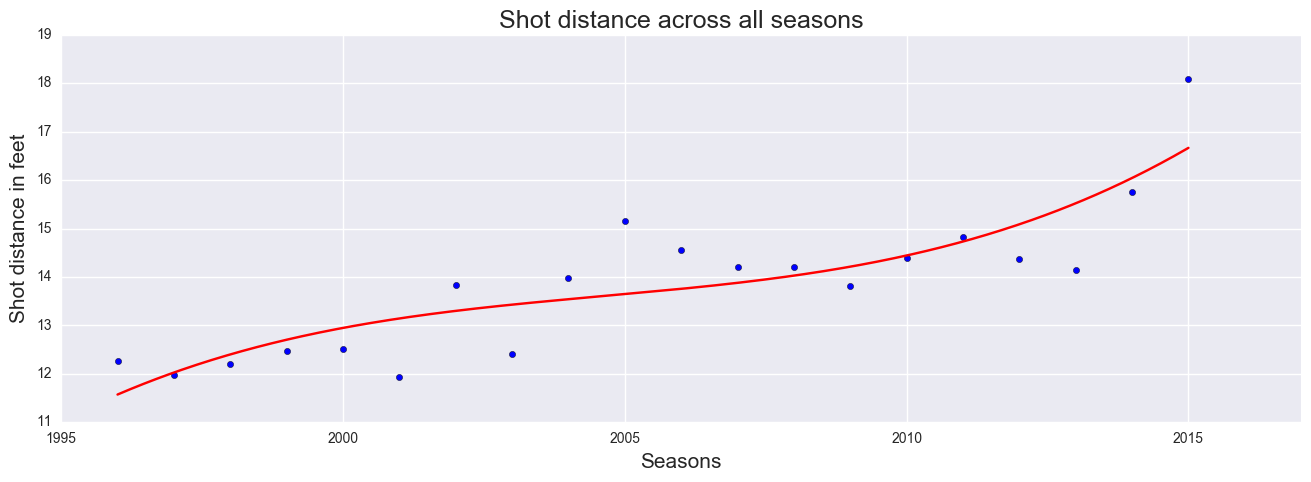

In [15]:
plt.figure(figsize=(16,5))
plt.plot(x, y, color = 'r')
plt.scatter(seasons, [i/10 for i in dist_season])
plt.xlim((1995, 2017))
plt.title("Shot distance across all seasons", fontsize = 18)
plt.xlabel("Seasons", fontsize = 15)
plt.ylabel("Shot distance in feet", fontsize = 15)

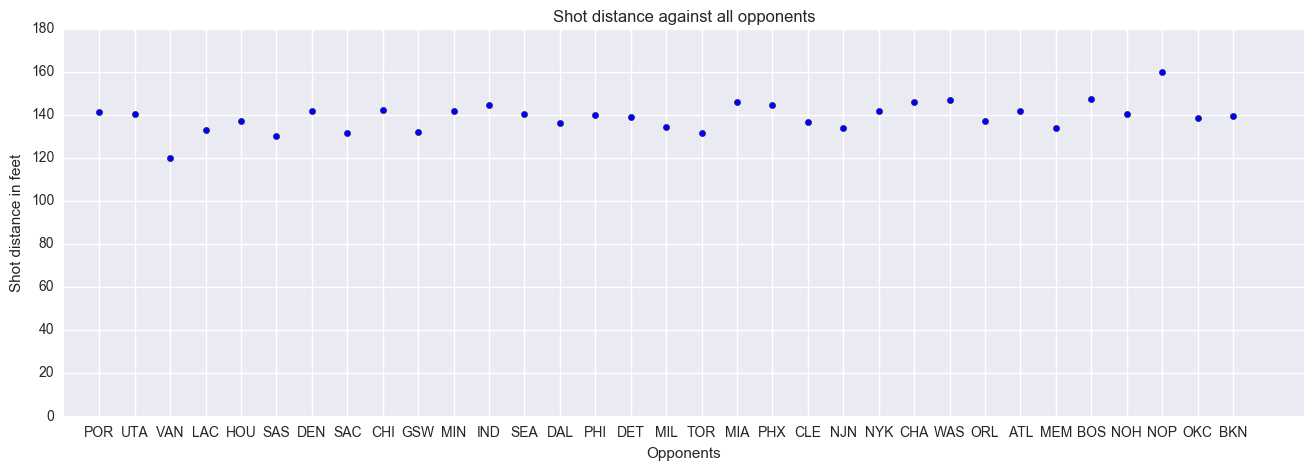

In [16]:
plt.figure(figsize=(16,5))
plt.plot(x, y, color = 'r')
oppo_map = list(range(1, len(opponents) + 1))
plt.scatter(oppo_map, dist_oppo)
plt.xlim((0, 35))
plt.xticks(oppo_map, opponents)
plt.title("Shot distance against all opponents")
plt.xlabel("Opponents")
plt.ylabel("Shot distance in feet")

# Based on his action type

In [17]:
df_sub2 = df[['combined_shot_type', 'opponent', 'year']]
# get the subset of the data
df_sub2.head()

,combined_shot_type,opponent,year
0,Jump Shot,POR,2000
1,Jump Shot,POR,2000
2,Jump Shot,POR,2000
3,Dunk,POR,2000
4,Jump Shot,POR,2000


In [18]:
d = pd.get_dummies(df_sub2, columns = ['combined_shot_type'])
# shot made flag
d.head()

,opponent,year,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot
0,POR,2000,0.0,0.0,0.0,1.0,0.0,0.0
1,POR,2000,0.0,0.0,0.0,1.0,0.0,0.0
2,POR,2000,0.0,0.0,0.0,1.0,0.0,0.0
3,POR,2000,0.0,1.0,0.0,0.0,0.0,0.0
4,POR,2000,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
d = d.groupby(by = ['year', 'opponent']).sum()
# group the data
d.head()

combined_shot_type_Bank Shot  combined_shot_type_Dunk  \
year opponent                                                          
1996 ATL                                0.0                      0.0   
     BOS                                0.0                      0.0   
     CHA                                0.0                      1.0   
     CHI                                0.0                      0.0   
     CLE                                0.0                      0.0   

               combined_shot_type_Hook Shot  combined_shot_type_Jump Shot  \
year opponent                                                               
1996 ATL                                0.0                           1.0   
     BOS                                0.0                           3.0   
     CHA                                0.0                           9.0   
     CHI                                0.0                           6.0   
     CLE                                0.0                           6.0   

               combined_shot_type_Layup  combined_shot_type_Tip Shot  
year opponent                                                         
1996 ATL                            3.0                          0.0  
     BOS                            2.0                          0.0  
     CHA                            3.0                          1.0  
     CHI                            2.0                          1.0  
     CLE                            0.0                          0.0

In [20]:
years = df_sub2['year'].unique()
teams = df_sub2['opponent'].unique()
print(len(d))
for y in years:
    for team in teams:
        try:
            d.loc[(y, team)]
        except KeyError:
            d.loc[(y, team), 'combined_shot_type_Bank Shot'] = 0
            d.loc[(y, team), 'combined_shot_type_Dunk'] = 0
            d.loc[(y, team), 'combined_shot_type_Hook Shot'] = 0
            d.loc[(y, team), 'combined_shot_type_Jump Shot'] = 0
            d.loc[(y, team), 'combined_shot_type_Layup'] = 0
            d.loc[(y, team), 'combined_shot_type_Tip Shot'] = 0        

529


In [21]:
d.head()

combined_shot_type_Bank Shot  combined_shot_type_Dunk  \
year opponent                                                          
1996 ATL                                0.0                      0.0   
     BOS                                0.0                      0.0   
     CHA                                0.0                      1.0   
     CHI                                0.0                      0.0   
     CLE                                0.0                      0.0   

               combined_shot_type_Hook Shot  combined_shot_type_Jump Shot  \
year opponent                                                               
1996 ATL                                0.0                           1.0   
     BOS                                0.0                           3.0   
     CHA                                0.0                           9.0   
     CHI                                0.0                           6.0   
     CLE                                0.0                           6.0   

               combined_shot_type_Layup  combined_shot_type_Tip Shot  
year opponent                                                         
1996 ATL                            3.0                          0.0  
     BOS                            2.0                          0.0  
     CHA                            3.0                          1.0  
     CHI                            2.0                          1.0  
     CLE                            0.0                          0.0

In [22]:
d['total'] = d.sum(axis = 1)
d.head()

combined_shot_type_Bank Shot  combined_shot_type_Dunk  \
year opponent                                                          
1996 ATL                                0.0                      0.0   
     BOS                                0.0                      0.0   
     CHA                                0.0                      1.0   
     CHI                                0.0                      0.0   
     CLE                                0.0                      0.0   

               combined_shot_type_Hook Shot  combined_shot_type_Jump Shot  \
year opponent                                                               
1996 ATL                                0.0                           1.0   
     BOS                                0.0                           3.0   
     CHA                                0.0                           9.0   
     CHI                                0.0                           6.0   
     CLE                                0.0                           6.0   

               combined_shot_type_Layup  combined_shot_type_Tip Shot  total  
year opponent                                                                
1996 ATL                            3.0                          0.0    4.0  
     BOS                            2.0                          0.0    5.0  
     CHA                            3.0                          1.0   14.0  
     CHI                            2.0                          1.0    9.0  
     CLE                            0.0                          0.0    6.0

In [23]:
for col in d.columns:
    # iterate over each column
    d[col] = d[col]/d['total']
    
d.drop('total', axis = 1, inplace = True)

In [24]:
d.fillna(0, inplace = True)
d.to_csv("action_type.csv")
# write to file

# Success of Kobe with respect to 2 point and 3 point shots

In [25]:
df_sub3 = df[['shot_type', 'opponent', 'year', 'shot_made_flag']]
# get the subset of the data
df_sub3.head()

,shot_type,opponent,year,shot_made_flag
0,2PT Field Goal,POR,2000,0
1,2PT Field Goal,POR,2000,1
2,2PT Field Goal,POR,2000,0
3,2PT Field Goal,POR,2000,1
4,2PT Field Goal,POR,2000,0


In [26]:
hit_point = df_sub3[df_sub3['shot_made_flag'] == 1]
miss_point = df_sub3[df_sub3['shot_made_flag'] == 0]
# get hit and miss points

In [27]:
d_hit = pd.get_dummies(hit_point.drop('shot_made_flag', axis = 1), columns = ['shot_type'])
# shot made flag

In [28]:
d_hit = d_hit.groupby(['year', 'opponent']).sum()
d_hit.head()

shot_type_2PT Field Goal  shot_type_3PT Field Goal
year opponent                                                    
1996 BOS                            1.0                       0.0
     CHA                            5.0                       1.0
     CHI                            2.0                       2.0
     CLE                            1.0                       1.0
     DAL                            7.0                       1.0

In [29]:
years = df_sub3['year'].unique()
teams = df_sub3['opponent'].unique()
for y in years:
    for team in teams:
        try:
            d_hit.loc[(y, team)]
        except KeyError:
            d_hit.loc[(y, team), 'shot_type_3PT Field Goal'] = 0
            d_hit.loc[(y, team), 'shot_type_2PT Field Goal'] = 0 
d_hit.head()

shot_type_2PT Field Goal  shot_type_3PT Field Goal
year opponent                                                    
1996 BOS                            1.0                       0.0
     CHA                            5.0                       1.0
     CHI                            2.0                       2.0
     CLE                            1.0                       1.0
     DAL                            7.0                       1.0

In [30]:
d_miss = pd.get_dummies(miss_point.drop('shot_made_flag', axis = 1), columns = ['shot_type'])
# shot made flag
d_miss = d_miss.groupby(['year', 'opponent']).sum()
years = df_sub3['year'].unique()
teams = df_sub3['opponent'].unique()
for y in years:
    for team in teams:
        try:
            d_miss.loc[(y, team)]
        except KeyError:
            d_miss.loc[(y, team), 'shot_type_3PT Field Goal'] = 0
            d_miss.loc[(y, team), 'shot_type_2PT Field Goal'] = 0 
d_miss.head()

shot_type_2PT Field Goal  shot_type_3PT Field Goal
year opponent                                                    
1996 ATL                            4.0                       0.0
     BOS                            2.0                       2.0
     CHA                            6.0                       2.0
     CHI                            3.0                       2.0
     CLE                            2.0                       2.0

In [31]:
point_type = pd.DataFrame()
# empty dataframe
d_hit['shot_type_2PT Field Goal']  = d_hit['shot_type_2PT Field Goal'] / ( d_hit['shot_type_2PT Field Goal'] +  d_miss['shot_type_2PT Field Goal'])
d_hit['shot_type_3PT Field Goal']  = d_hit['shot_type_3PT Field Goal'] / ( d_hit['shot_type_3PT Field Goal'] +  d_miss['shot_type_3PT Field Goal'])

d_hit.fillna(0, inplace=True)
d_hit.head()

shot_type_2PT Field Goal  shot_type_3PT Field Goal
year opponent                                                    
1996 BOS                       0.333333                  0.000000
     CHA                       0.454545                  0.333333
     CHI                       0.400000                  0.500000
     CLE                       0.333333                  0.333333
     DAL                       0.411765                  0.142857

In [32]:
d_hit.to_csv("point_type_accuracy.csv")

# Kobe bryant on location performance

In [34]:
from sklearn import mixture

In [36]:
numGaussians = 13
gaussianMixtureModel = mixture.GMM(n_components=numGaussians, covariance_type='full', 
                                   params='wmc', init_params='wmc',
                                   random_state=1, n_init=3,  verbose=0)
gaussianMixtureModel.fit(df.ix[:,['loc_x','loc_y']])

df['shotLocationCluster'] = gaussianMixtureModel.predict(data.ix[:,['loc_x','loc_y']])

C:\Users\anirudhkm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\anirudhkm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\anirudhkm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\anirudhkm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: Deprecat

NameError: name 'data' is not defined